In [72]:
import os

import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
f = open('/guan/workplace/Databox/temp_work/ziyu/Collaborate_with_NTUST/labelData/ladybug_13451176_20200622_110245_ColorProcessed_000325_Cam0_331_080-6862.txt', 'r')
f.read().split('\n')[:-1]

['0 0.450684 0.495507 0.020508 0.013889',
 '0 0.348633 0.433824 0.025391 0.009804',
 '0 0.962891 0.437092 0.033203 0.057190',
 '0 0.506348 0.437092 0.034180 0.009804',
 '0 0.751465 0.421569 0.024414 0.014706',
 '0 0.589844 0.523284 0.009766 0.017157',
 '0 0.449219 0.457925 0.019531 0.013889',
 '0 0.451172 0.506536 0.013672 0.009804',
 '0 0.223633 0.492239 0.017578 0.015523',
 '0 0.325684 0.433824 0.026367 0.014706',
 '0 0.265137 0.466503 0.008789 0.027778',
 '0 0.223633 0.503676 0.013672 0.012255',
 '0 0.723633 0.478758 0.009766 0.014706']

In [8]:
img = cv2.imread('/guan/workplace/Databox/temp_work/ziyu/Collaborate_with_NTUST/img/ladybug_13451176_20200622_110245_ColorProcessed_000325_Cam0_331_080-6862.png')
img

array([[[216, 177, 152],
        [214, 187, 155],
        [217, 189, 154],
        ...,
        [159, 149, 117],
        [161, 141, 124],
        [171, 139, 122]],

       [[210, 185, 155],
        [214, 182, 159],
        [223, 179, 160],
        ...,
        [157, 150, 123],
        [156, 145, 127],
        [161, 135, 126]],

       [[226, 180, 151],
        [226, 184, 152],
        [225, 176, 153],
        ...,
        [169, 146, 124],
        [161, 142, 134],
        [163, 137, 127]],

       ...,

       [[229, 149, 193],
        [225, 150, 196],
        [219, 151, 201],
        ...,
        [199, 141, 176],
        [189, 136, 175],
        [202, 138, 181]],

       [[225, 156, 193],
        [217, 154, 196],
        [210, 160, 198],
        ...,
        [192, 146, 178],
        [189, 141, 176],
        [196, 140, 183]],

       [[226, 150, 202],
        [227, 148, 202],
        [221, 152, 198],
        ...,
        [194, 149, 176],
        [189, 149, 168],
        [211, 141, 176]]

In [11]:
def plot_one_box(xyxy, img, color=None, label=None, line_thickness=None):
    line_thickness = line_thickness or round(0.002 * (img.shape[0] + img.shape[1]) / 2) + 1
    color = color or [random.randint(0, 255) for _ in range(3)]
    c1, c2 = (int(xyxy[0]), int(xyxy[1])), (int(xyxy[2]), int(xyxy[3]))
    cv2.rectangle(img, c1, c2, color, thickness=line_thickness)

    if label:
        font_thickness = max(line_thickness - 1, 1)
        text_size = cv2.getTextSize(label, 0, fontScale=line_thickness / 3, thickness=font_thickness)[0]
        c2 = c1[0] + text_size[0], c1[1] - text_size[1] - 3
        cv2.putText(img, label, (c1[0], c1[1] - 2), 0, line_thickness / 3, color, thickness=font_thickness, lineType=cv2.LINE_AA)

In [24]:
xyxy

[885.7267919999999, 490.248192, 11.953584000000001, 15.058944]

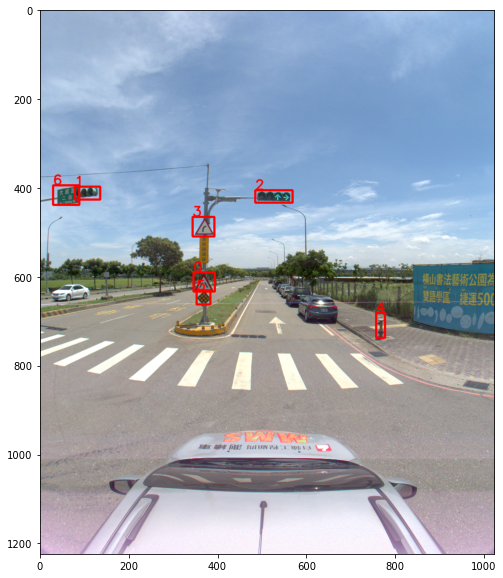

In [36]:
f = open('/guan/workplace/Databox/temp_work/ziyu/Collaborate_with_NTUST/labelData/ladybug_13451176_20200622_110245_ColorProcessed_000336_Cam0_342_083-0353.txt', 'r')
img = cv2.cvtColor(cv2.imread('/guan/workplace/Databox/temp_work/ziyu/Collaborate_with_NTUST/img/ladybug_13451176_20200622_110245_ColorProcessed_000336_Cam0_342_083-0353.png'), cv2.COLOR_BGR2RGB)
bboxes_str = f.read().split('\n')[:-1]
img_h, img_w, _ = img.shape
for idx, box_str in enumerate(bboxes_str):
    _, x, y, w, h = box_str.split(' ')
    x, y, w, h = float(x), float(y), float(w), float(h)
    xyxy = [(x - w / 2) * img_w, (y - h / 2) * img_h, (x + w / 2) * img_w, (y + h / 2) * img_h]
    plot_one_box(xyxy, img, label=str(idx), color=(255, 0, 0))

plt.figure(figsize=(16, 10))
plt.imshow(img)

In [39]:
df = pd.read_csv('/guan/workplace/Databox/temp_work/ziyu/Collaborate_with_NTUST/GNSS/ladybug_13451176_20200622_110245.csv')
df.head()

,FRAME,Date,UTC,IntSec,GPSWkSec,Longitude,Latitude,Easting,Northing,H-Ell,Roll,Pitch,Heading,ToffSet,GWSDiff,IntDiff,TrgMiss
0,20200622_110245_00000000,6/22/2020,03:00:39.800,96.403750,97257.800,121.216202,25.018957,271820.124,2767894.653,95.304,2.812163,-0.194746,-51.167762,97161.396250,0.000,0.00000,0.00000
1,20200622_110245_00000001,6/22/2020,03:00:40.786,97.390375,97258.786,121.216187,25.018967,271818.627,2767895.768,95.273,2.852656,0.230023,-54.526593,97161.395625,0.986,0.98663,-0.00063
2,20200622_110245_00000002,6/22/2020,03:00:41.518,98.122250,97259.518,121.216172,25.018976,271817.073,2767896.830,95.252,2.761341,0.488960,-56.419350,97161.395750,0.732,0.73187,0.00013
3,20200622_110245_00000003,6/22/2020,03:00:42.125,98.729500,97260.125,121.216156,25.018986,271815.484,2767897.840,95.239,2.534483,0.575894,-58.030472,97161.395500,0.607,0.60725,-0.00025
4,20200622_110245_00000004,6/22/2020,03:00:42.662,99.265750,97260.662,121.216140,25.018994,271813.857,2767898.817,95.232,2.185779,0.574645,-59.201058,97161.396250,0.537,0.53625,0.00075


In [42]:
split_name = 'ladybug_13451176_20200622_110245_ColorProcessed_000336_Cam0_342_083-0353.png'.split('_')
frame_name = '_'.join(split_name[2:4] + ['00' + split_name[5]])

In [44]:
df.loc[df.FRAME == frame_name]

,FRAME,Date,UTC,IntSec,GPSWkSec,Longitude,Latitude,Easting,Northing,H-Ell,Roll,Pitch,Heading,ToffSet,GWSDiff,IntDiff,TrgMiss
336,20200622_110245_00000336,6/22/2020,03:02:34.445,211.044125,97372.445,121.216872,25.023781,271886.888,2768429.146,90.018,0.345542,-0.701287,42.62494,97161.400875,0.196,0.1955,0.0005


In [58]:
# I manually have this with cloudcompare "Point picking" function, I would try to code it to automatically (or semi-) obtain this coordinates
obj_coords = [[271893.125, 2768440, 90.05], [271888.218750, 2768442, 94.129997], [271895.406250, 2768437.75, 93.980003], [271893.125, 2768440, 92.629997], [271897.53125, 2768433.75, 88.27], [271893.125, 2768440, 89.42], [271887.375, 2768443, 94.129997]]

In [75]:
# Here is the euclidean distance from gpus to objects
gps_location = df.loc[df.FRAME == frame_name][['Easting', 'Northing', 'H-Ell']].values
for obj_coord in obj_coords:
    print(np.sum(np.power(gps_location - obj_coord, 2)))

156.71050899632206
183.90473088587703
162.28686683175656
163.53201332433107
137.5310905613049
157.06708899632207
209.07900432297345
